<a href="https://colab.research.google.com/github/LeonardoAragao/Aplicativo-Calculadora_Gasolina/blob/main/Analise%20de%20dados%20do%20Brasileir%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null​


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz​



In [ ]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz​

tar: spark-3.1.2-bin-hadoop2.7.tgz​: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz


In [ ]:
!tar -xzf spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
import os

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
os.environ["HADOOP_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] += ":/content/spark-3.1.2-bin-hadoop2.7/bin:/content/spark-3.1.2-bin-hadoop2.7/sbin"

In [ ]:
!pip install -q pyspark

In [ ]:
!pip install -q pandas


In [ ]:
!pip install -q numpy

# Começo da Analise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('campeonato.csv')
cartoes= pd.read_csv('cartoes.csv')
estatistica= pd.read_csv('estatisticas.csv')
gols= pd.read_csv('gols.csv')

In [ ]:
df

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ


Usei o list para exibir as colunas

In [ ]:
list(df)

['ID',
 'rodata',
 'data',
 'hora',
 'mandante',
 'visitante',
 'formacao_mandante',
 'formacao_visitante',
 'tecnico_mandante',
 'tecnico_visitante',
 'vencedor',
 'arena',
 'mandante_Placar',
 'visitante_Placar',
 'mandante_Estado',
 'visitante_Estado']

Classificação dos times por vitórias

In [ ]:
df.vencedor.value_counts()

,count
vencedor,
-,2221
Sao Paulo,365
Flamengo,354
Santos,340
Internacional,339
Palmeiras,329
Atletico-MG,327
Corinthians,326
Fluminense,322


Gráfico da classificação dos times por vitórias

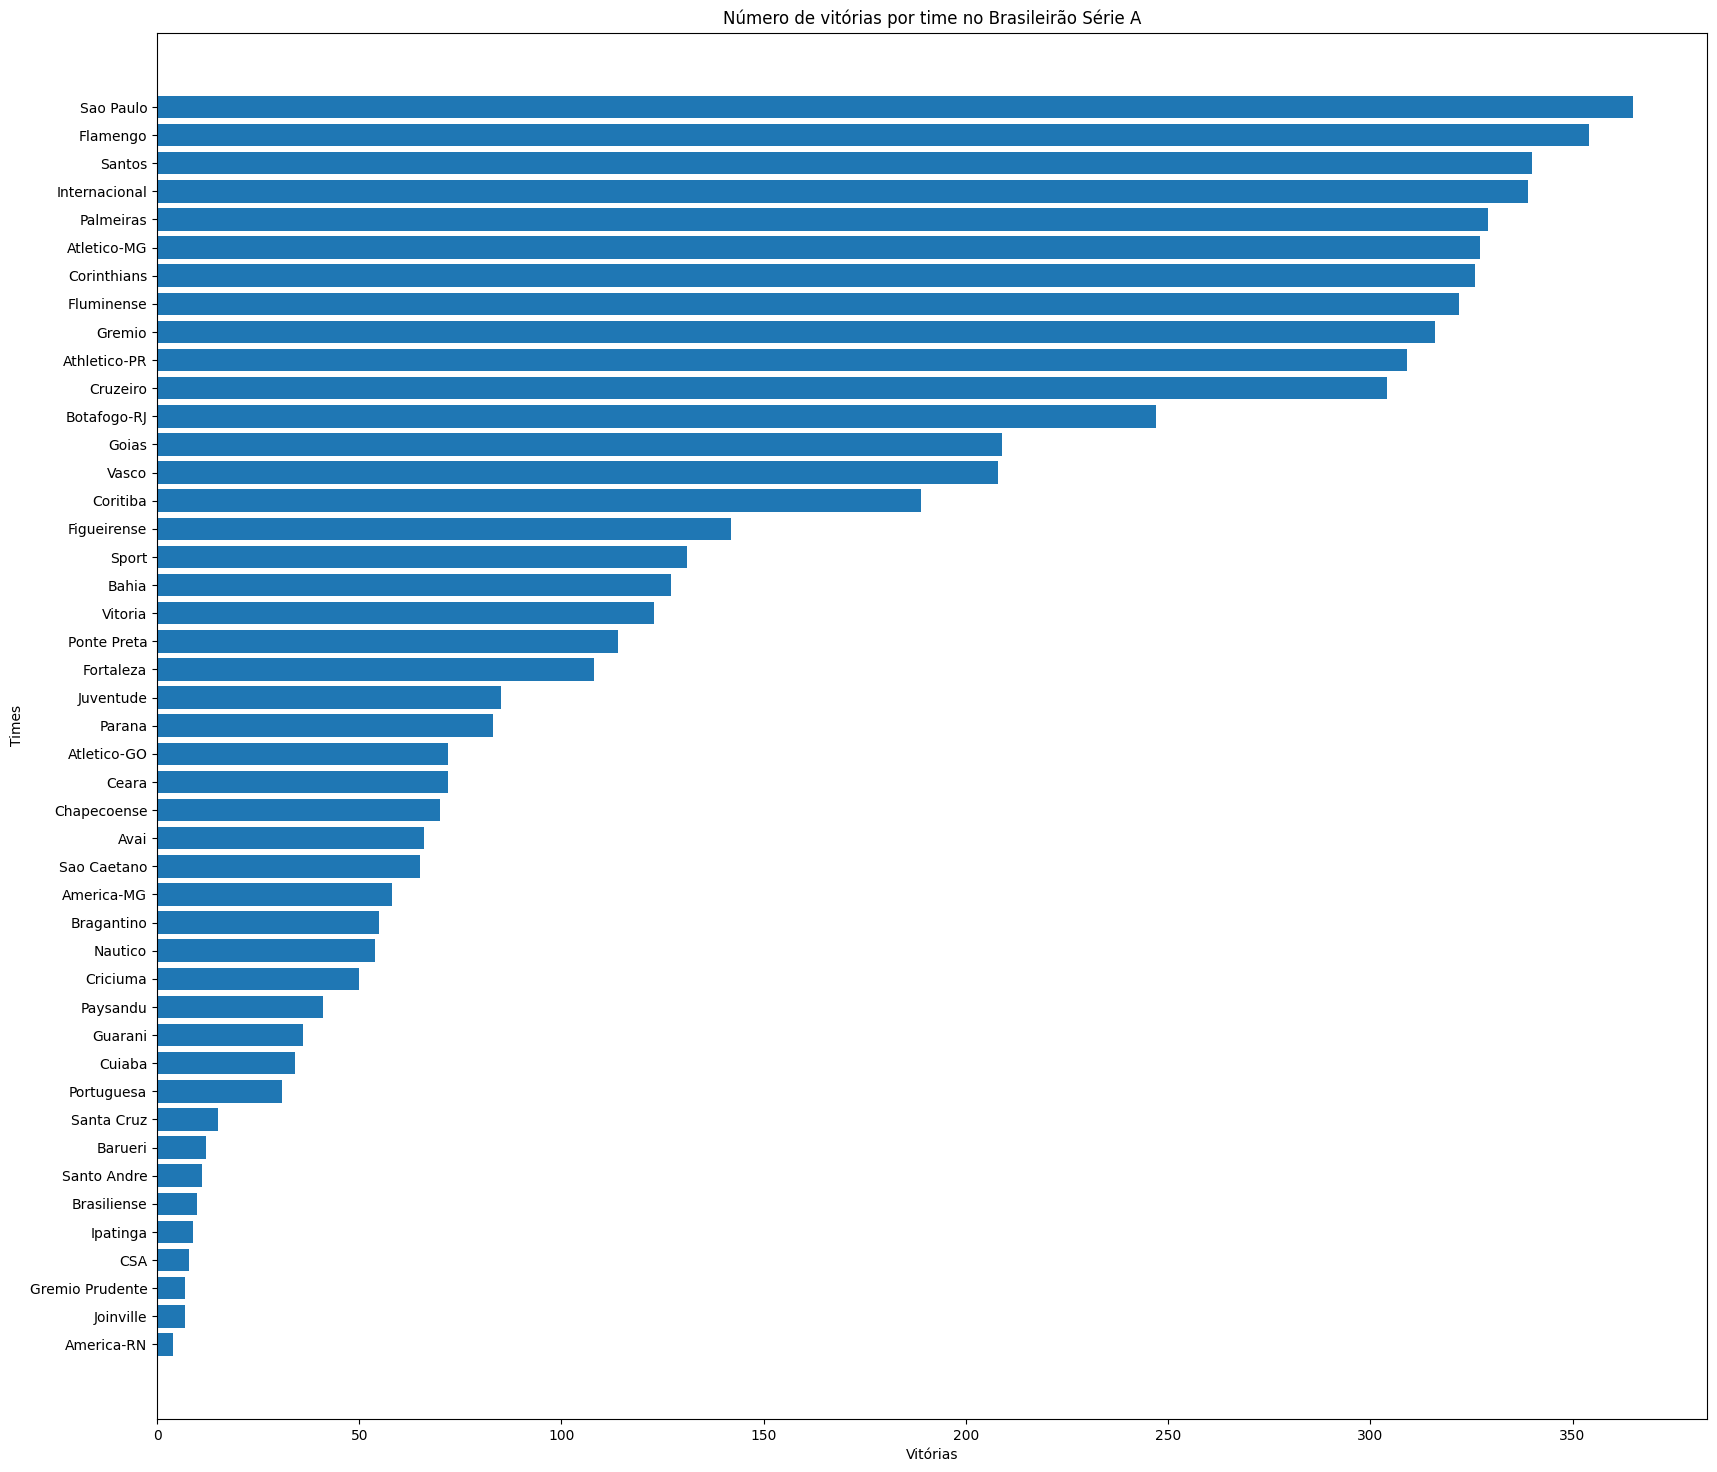

In [ ]:
y=df.vencedor.value_counts(ascending=True)
y=y.iloc[:45]
x=pd.Series(df.vencedor.value_counts(ascending=True).index)
x=x.iloc[:45]
plt.barh(x,y)
plt.ylabel('Times')
plt.xlabel('Vitórias')
plt.title('Número de vitórias por time no Brasileirão Série A')
plt.gcf().set_size_inches(20, 18)
plt.show()

Número de vitórias por estado

In [ ]:
df.mandante_Estado.value_counts()

,count
mandante_Estado,
SP,2097
RJ,1480
RS,902
MG,875
PR,809
SC,587
GO,428
BA,411
PE,342


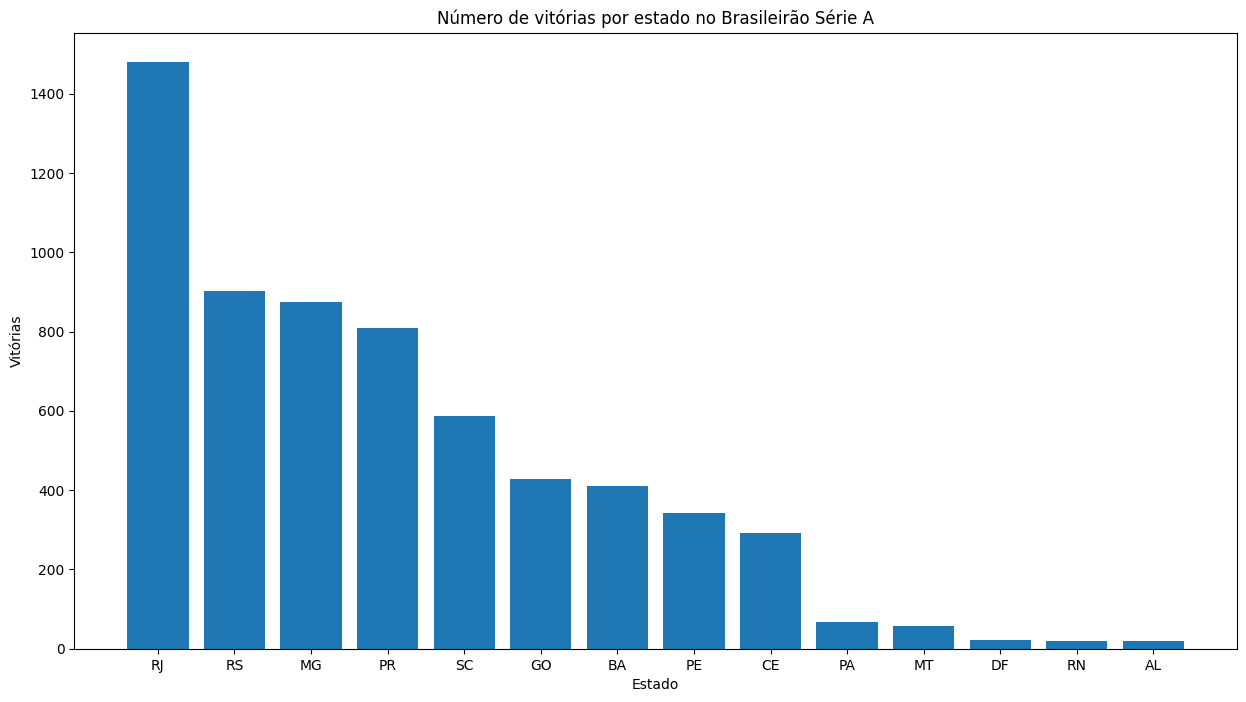

In [ ]:
y1=df.mandante_Estado.value_counts(ascending=False)
y1=y1.iloc[1:]
x1=pd.Series(df.mandante_Estado.value_counts(ascending=False).index)
x1=x1.iloc[1:]
plt.bar(x1,y1)
plt.xlabel('Estado')
plt.ylabel('Vitórias')
plt.title('Número de vitórias por estado no Brasileirão Série A')
plt.gcf().set_size_inches(15,8)
plt.show()

Resumo estatístico dos gols do time mandante

In [ ]:
df['mandante_Placar'].describe()

,mandante_Placar
count,8405.000000
mean,1.541225
std,1.230607
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


Resumo estatístico dos gols do time visitante

In [ ]:
df['visitante_Placar'].describe()

,visitante_Placar
count,8405.000000
mean,1.027008
std,1.027170
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


Criação de uma série para identificar a diferença dos placares e identificar as 5 maiores goleadas

In [ ]:
for row in df:
    dif= abs(df['mandante_Placar'] - df['visitante_Placar'])
print(dif.nlargest(n=5))

66     7
547    7
936    7
285    6
476    6
dtype: int64


5 maiores goleadas da história

In [ ]:
goleadas=pd.DataFrame([df.loc[66],df.loc[547],df.loc[936],df.loc[285],df.loc[476]])
goleadas.drop(columns=['formacao_mandante','formacao_visitante','tecnico_mandante','tecnico_visitante'])

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
66,66,6,27/04/2003,16:00,Goias,Juventude,Goias,Serra Dourada,7,0,GO,RS
547,548,46,14/12/2003,16:00,Bahia,Cruzeiro,Cruzeiro,Fonte Nova,0,7,BA,MG
936,937,33,28/09/2004,20:30,Sao Paulo,Paysandu,Sao Paulo,Morumbi,7,0,SP,PA
285,285,24,07/08/2003,20:30,Flamengo,Bahia,Flamengo,Maracanã,6,0,RJ,BA
476,477,40,02/11/2003,16:00,Figueirense,Paysandu,Figueirense,Orlando Scarpelli,6,0,SC,PA


Top 10 estádios que mais receberam jogos

In [ ]:
estadio=df.arena.value_counts()
estadio.head(10)

,count
arena,
Maracanã,631
Mineirão,459
Morumbi,413
Couto Pereira,295
Serra Dourada,235
Orlando Scarpelli,219
Pacaembu,213
Estádio Raimundo Sampaio,201
Beira Rio,200


Cartões recebidos por time

In [ ]:
vermelho=pd.pivot_table(estatistica,values=['cartao_vermelho'],columns='clube',aggfunc='sum')
amarelo=pd.pivot_table(estatistica,values=['cartao_amarelo'],columns='clube',aggfunc='sum')

In [ ]:
vermelho=vermelho.transpose()
vermelho.sort_values('cartao_vermelho',ascending=False)

,cartao_vermelho
clube,
Fluminense,53
Internacional,49
Santos,48
Sao Paulo,43
Flamengo,41
Vasco,40
Palmeiras,38
Coritiba,38
Bahia,34


In [ ]:
amarelo=amarelo.transpose()
amarelo.sort_values('cartao_amarelo',ascending=False)

,cartao_amarelo
clube,
Santos,805
Fluminense,803
Sao Paulo,789
Palmeiras,788
Internacional,777
Atletico-MG,741
Athletico-PR,727
Flamengo,723
Gremio,681


Ordem dos times por quantidade de faltas

In [ ]:
faltas=pd.pivot_table(estatistica,values=['faltas'],columns=['clube'],aggfunc='sum')
faltas=faltas.transpose()
faltas.sort_values('faltas',ascending=False)

,faltas
clube,
Palmeiras,5417
Sao Paulo,5206
Flamengo,5007
Atletico-MG,4996
Santos,4937
Fluminense,4893
Athletico-PR,4875
Internacional,4673
Corinthians,4490


Gráfico com a quantidade de cartões amarelos e vermelhos por time

In [1]:
qtd_cartoes=qtd_cartoes.sort_values('cartao_amarelo',ascending=True)
x4=qtd_cartoes['cartao_amarelo'].index
y4 = qtd_cartoes['cartao_amarelo'].values
x5=qtd_cartoes['cartao_vermelho'].index
y5 = qtd_cartoes['cartao_vermelho'].values
plt.gcf().set_size_inches(15,12)
width=0.7
plt.xlabel('Quantidade de cartões amarelos e vermelhos')
plt.ylabel('Time')
plt.title('Gráfico de barras agrupadas de cartões amarelos e vermelhos por time')
plt.barh(x4, y4,width,color="yellow")
plt.barh(x4,y5,width,color="red")

NameError: name 'qtd_cartoes' is not defined

Criando uma tabela para mostrar o artilheiro do Brasileirao pontos corridos


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum


In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = spark.read.csv("gols.csv", header=True, inferSchema=True)

In [ ]:
df.show(5)

+----------+------+-------------+--------------------+------+-----------+
|partida_id|rodata|        clube|              atleta|minuto|tipo_de_gol|
+----------+------+-------------+--------------------+------+-----------+
|      4607|     1|   Fluminense|Nirley da Silva F...|    59| Gol Contra|
|      4607|     1|   Fluminense|                Fred|    45|    Penalty|
|      4607|     1|   Fluminense|        Rafael Sóbis|    31|       NULL|
|      4608|     1|Internacional|    Charles Aránguiz|     6|       NULL|
|      4612|     1|     Cruzeiro|Nílton Ferreira J...|    63|       NULL|
+----------+------+-------------+--------------------+------+-----------+
only showing top 5 rows



In [ ]:
tabela_artilheiros = df.groupBy("atleta").agg(
    spark_sum("tipo_de_gol").alias("total_gols")
).orderBy(col("total_gols").desc())

In [ ]:
tabela_artilheiros.show(10)

+--------------------+----------+
|              atleta|total_gols|
+--------------------+----------+
|               Apodi|      NULL|
|Ederson Honorato ...|      NULL|
|Clayson Henrique ...|      NULL|
|      Reinaldo Lenis|      NULL|
|                Rony|      NULL|
|Gustavo Nonato Sa...|      NULL|
|Adriano Correia C...|      NULL|
|Michel Macedo Roc...|      NULL|
|           Alan Ruiz|      NULL|
|Alison Lopes Ferr...|      NULL|
+--------------------+----------+
only showing top 10 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count , when

In [ ]:
gols_validos = df.filter((col("tipo_de_gol").isNotNull()) & (col("tipo_de_gol") != "Gol Contra"))

In [ ]:
tabela_artilheiros = gols_validos.groupBy("atleta").agg(
    count("tipo_de_gol").alias("total_gols")
).orderBy(col("total_gols").desc())

In [ ]:
tabela_artilheiros.show(10)

+--------------------+----------+
|              atleta|total_gols|
+--------------------+----------+
|        Fábio Santos|        26|
|     Gabriel Barbosa|        22|
|                Fred|        15|
|         Diego Souza|        15|
|Reinaldo Manoel d...|        15|
|        Yago Pikachu|        14|
|    Henrique Dourado|        14|
|                Nenê|        14|
|                Hulk|        13|
| Wellington Paulista|        13|
+--------------------+----------+
only showing top 10 rows



In [ ]:
df = df.withColumn("tipo_de_gol", when(col("tipo_de_gol").isNull(), "Pontos").otherwise(col("tipo_de_gol")))

In [ ]:
gols_validos = df.filter(col("tipo_de_gol") != "Gol Contra")

In [ ]:
tabela_artilheiros = gols_validos.groupBy("atleta").agg(
    count("tipo_de_gol").alias("total_gols")
).orderBy(col("total_gols").desc())

In [ ]:
tabela_artilheiros.show(10)

+--------------------+----------+
|              atleta|total_gols|
+--------------------+----------+
|     Gabriel Barbosa|        97|
|                Fred|        81|
|         Diego Souza|        80|
|Luciano da Rocha ...|        64|
|               Pedro|        61|
|      Bruno Henrique|        60|
|Eduardo Pereira R...|        56|
|    Ricardo Oliveira|        56|
|Willian Gomes de ...|        56|
|Giorgian De Arras...|        54|
+--------------------+----------+
only showing top 10 rows

